### Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)

# Check the initial data
print("Initial data:")
print(df.head())

# Correct the data in the "height" column
df['height'] = np.random.randint(150, 181, size=len(df))

# Check the corrected data
print("\nCorrected data:")
print(df.head())

# Retrieve the 'height' column after correction
height_column = df['height']
print(height_column)

Initial data:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  

Corrected data:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston

##### Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

In [3]:
# 1. Calculate the distribution of employees across each team
team_distribution = df['Team'].value_counts()

# Calculate the percentage split relative to the total number of employees
total_employees = len(df)
percentage_split = (team_distribution / total_employees) * 100

# Display the results
print("Distribution of Employees Across Each Team:")
print(team_distribution)
print("\nPercentage Split Relative to Total Number of Employees:")
print(percentage_split)

Distribution of Employees Across Each Team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage Split Relative to Total Number of Employees

##### Segregate employees based on their positions within the company.

In [4]:
employees_by_position = df.groupby('Position')

# Display the number of employees in each position
for position, employees in employees_by_position:
    print(f"Position: {position}, Number of Employees: {len(employees)}")

Position: C, Number of Employees: 79
Position: PF, Number of Employees: 100
Position: PG, Number of Employees: 92
Position: SF, Number of Employees: 85
Position: SG, Number of Employees: 102


##### Identify the predominant age group among employees. 

In [5]:
age_bins = [20, 30, 40, 50, 60, 70]  # You can adjust the age ranges as needed

# Create age groups
age_groups = pd.cut(df['Age'], bins=age_bins)

# Count the number of employees in each age group
age_group_counts = age_groups.value_counts()

# Identify the predominant age group
predominant_age_group = age_group_counts.idxmax()

# Display the results
print("Number of Employees in Each Age Group:")
print(age_group_counts)
print("\nPredominant Age Group:", predominant_age_group)

# Group the data by team and calculate the total salary expenditure for each team
team_salary_expenditure = df.groupby('Team')['Salary'].sum()

Number of Employees in Each Age Group:
Age
(20, 30]    346
(30, 40]     91
(40, 50]      0
(50, 60]      0
(60, 70]      0
Name: count, dtype: int64

Predominant Age Group: (20, 30]


##### Discover which team and position have the highest salary expenditure.

In [6]:
position_salary_expenditure = df.groupby('Position')['Salary'].sum()

# Discover which team and position have the highest salary expenditure
team_highest_salary = team_salary_expenditure.idxmax()
position_highest_salary = position_salary_expenditure.idxmax()

# Display the results
print("Team with the Highest Salary Expenditure:", team_highest_salary)
print("Position with the Highest Salary Expenditure:", position_highest_salary)

Team with the Highest Salary Expenditure: Cleveland Cavaliers
Position with the Highest Salary Expenditure: C


##### Investigate if there's any correlation between age and salary, and represent it visually.

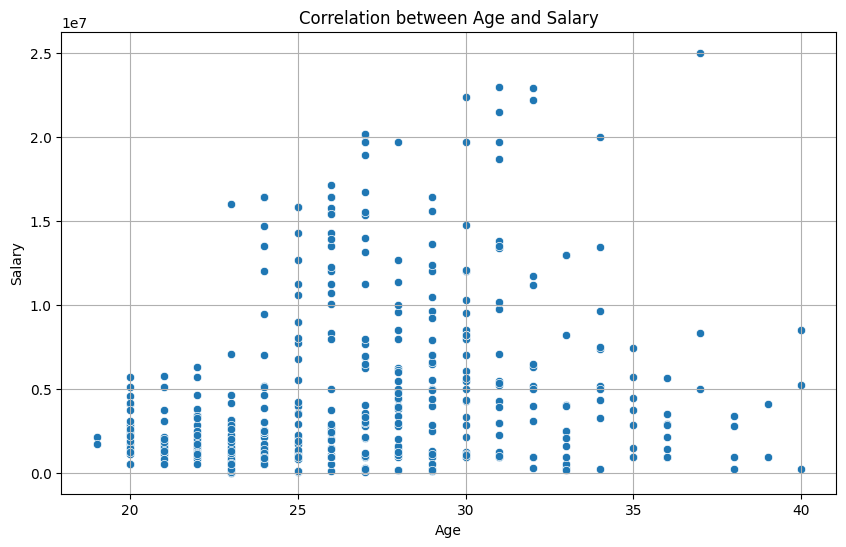

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()